In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2645 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1101 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0748 - acc: 0.9767


In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.1026 - acc: 0.9700
0.10258754119705409 0.97


In [9]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

[[2.7275118e-09 3.0240511e-07 1.4629802e-05 ... 9.9991524e-01
  4.1050075e-08 1.5008034e-07]
 [3.2663754e-09 2.9043091e-04 9.9970078e-01 ... 1.0695927e-08
  9.3862417e-07 1.4041347e-10]
 [3.0759148e-07 9.9969494e-01 2.8731360e-05 ... 8.7677407e-05
  1.4433313e-04 2.6459572e-06]
 ...
 [1.7816587e-08 7.4472414e-06 1.8963028e-07 ... 3.1716979e-04
  4.5260291e-05 4.9533048e-03]
 [1.4450757e-07 1.7157966e-07 2.4733698e-08 ... 2.6474933e-07
  3.7522725e-05 4.8026239e-10]
 [1.7408759e-08 1.8693463e-10 1.0356812e-08 ... 4.0997135e-13
  7.7292617e-09 6.3429337e-09]]


In [10]:
import numpy as np

print(np.argmax(predictions[0]))

7


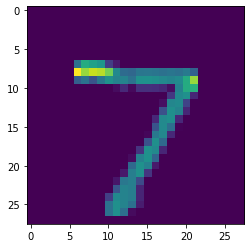

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()